# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
EPOCHS = 50
BATCH_SIZE = 256
LEARNING_RATE = [1e-3,1e-2]


In [7]:
def get_optimizer(optimizer_name):
    OPTIMIZERS = {"SGD":keras.optimizers.SGD(lr=lr),
                  "RMSprop":keras.optimizers.RMSprop(lr=lr),
                  "AdaGrad":keras.optimizers.Adagrad(lr=lr),
                  "Adam":keras.optimizers.Adam(lr=lr)}
    return OPTIMIZERS.get(optimizer_name)

In [8]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    optimizer_names = ["SGD","RMSprop","AdaGrad","Adam"]
    for optimizer_name in optimizer_names:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with lr = %f , optimizer=%s" % (lr,optimizer_name))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        #optimizer = keras.optimizers.SGD(lr=lr)
        optimizer = get_optimizer(optimizer_name)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]

        exp_name_tag = "lr: %f optimizer: %s" % (lr,optimizer_name)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with lr = 0.001000 , optimizer=SGD
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
196/196 [==============================] - 7s 34ms/st

196/196 [==============================] - 5s 27ms/step - loss: 1.6936 - accuracy: 0.4133 - val_loss: 1.7005 - val_accuracy: 0.4135
Experiment with lr = 0.001000 , optimizer=RMSprop
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable para

196/196 [==============================] - 7s 35ms/step - loss: 0.8102 - accuracy: 0.7118 - val_loss: 2.2504 - val_accuracy: 0.4529
Epoch 50/50
196/196 [==============================] - 7s 36ms/step - loss: 0.7995 - accuracy: 0.7131 - val_loss: 1.9922 - val_accuracy: 0.4697
Experiment with lr = 0.001000 , optimizer=AdaGrad
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
__________________________________________________________

196/196 [==============================] - 5s 26ms/step - loss: 1.5241 - accuracy: 0.4687 - val_loss: 1.5486 - val_accuracy: 0.4579
Epoch 49/50
196/196 [==============================] - 6s 32ms/step - loss: 1.5206 - accuracy: 0.4701 - val_loss: 1.5475 - val_accuracy: 0.4588
Epoch 50/50
196/196 [==============================] - 5s 28ms/step - loss: 1.5168 - accuracy: 0.4713 - val_loss: 1.5444 - val_accuracy: 0.4599
Experiment with lr = 0.001000 , optimizer=Adam
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________

196/196 [==============================] - 6s 31ms/step - loss: 0.6718 - accuracy: 0.7610 - val_loss: 1.7633 - val_accuracy: 0.5176
Epoch 48/50
196/196 [==============================] - 7s 38ms/step - loss: 0.6477 - accuracy: 0.7697 - val_loss: 1.9046 - val_accuracy: 0.5132
Epoch 49/50
196/196 [==============================] - 5s 27ms/step - loss: 0.6572 - accuracy: 0.7637 - val_loss: 1.8024 - val_accuracy: 0.5137
Epoch 50/50
196/196 [==============================] - 6s 30ms/step - loss: 0.6300 - accuracy: 0.7736 - val_loss: 1.7755 - val_accuracy: 0.5171
Experiment with lr = 0.010000 , optimizer=SGD
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
______________________________________

196/196 [==============================] - 5s 27ms/step - loss: 1.2372 - accuracy: 0.5668 - val_loss: 1.3849 - val_accuracy: 0.5006
Epoch 47/50
196/196 [==============================] - 5s 24ms/step - loss: 1.2305 - accuracy: 0.5669 - val_loss: 1.5022 - val_accuracy: 0.4816
Epoch 48/50
196/196 [==============================] - 5s 25ms/step - loss: 1.2253 - accuracy: 0.5711 - val_loss: 1.4636 - val_accuracy: 0.4887
Epoch 49/50
196/196 [==============================] - 6s 30ms/step - loss: 1.2194 - accuracy: 0.5727 - val_loss: 1.4414 - val_accuracy: 0.4876
Epoch 50/50
196/196 [==============================] - 6s 29ms/step - loss: 1.2102 - accuracy: 0.5740 - val_loss: 1.4851 - val_accuracy: 0.4793
Experiment with lr = 0.010000 , optimizer=RMSprop
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
______________________

196/196 [==============================] - 8s 42ms/step - loss: 1.7438 - accuracy: 0.3680 - val_loss: 1.7229 - val_accuracy: 0.3704
Epoch 46/50
196/196 [==============================] - 7s 37ms/step - loss: 1.7393 - accuracy: 0.3724 - val_loss: 1.8244 - val_accuracy: 0.3370
Epoch 47/50
196/196 [==============================] - 7s 38ms/step - loss: 1.7342 - accuracy: 0.3715 - val_loss: 1.7636 - val_accuracy: 0.3619
Epoch 48/50
196/196 [==============================] - 9s 47ms/step - loss: 1.7305 - accuracy: 0.3730 - val_loss: 1.7568 - val_accuracy: 0.3623
Epoch 49/50
196/196 [==============================] - 10s 48ms/step - loss: 1.7325 - accuracy: 0.3714 - val_loss: 1.9522 - val_accuracy: 0.3112
Epoch 50/50
196/196 [==============================] - 8s 40ms/step - loss: 1.7353 - accuracy: 0.3722 - val_loss: 1.7484 - val_accuracy: 0.3657
Experiment with lr = 0.010000 , optimizer=AdaGrad
Model: "functional_1"
_________________________________________________________________
Layer (ty

196/196 [==============================] - 5s 23ms/step - loss: 1.0844 - accuracy: 0.6234 - val_loss: 1.3536 - val_accuracy: 0.5263
Epoch 45/50
196/196 [==============================] - 5s 23ms/step - loss: 1.0683 - accuracy: 0.6284 - val_loss: 1.4021 - val_accuracy: 0.5153
Epoch 46/50
196/196 [==============================] - 5s 23ms/step - loss: 1.0634 - accuracy: 0.6283 - val_loss: 1.3046 - val_accuracy: 0.5393
Epoch 47/50
196/196 [==============================] - 4s 23ms/step - loss: 1.0506 - accuracy: 0.6321 - val_loss: 1.3655 - val_accuracy: 0.5185
Epoch 48/50
196/196 [==============================] - 4s 22ms/step - loss: 1.0470 - accuracy: 0.6375 - val_loss: 1.4552 - val_accuracy: 0.5053
Epoch 49/50
196/196 [==============================] - 4s 22ms/step - loss: 1.0380 - accuracy: 0.6366 - val_loss: 1.3386 - val_accuracy: 0.5258
Epoch 50/50
196/196 [==============================] - 4s 22ms/step - loss: 1.0293 - accuracy: 0.6419 - val_loss: 1.3893 - val_accuracy: 0.5150
Expe

196/196 [==============================] - 5s 23ms/step - loss: 1.4667 - accuracy: 0.4750 - val_loss: 1.5572 - val_accuracy: 0.4495
Epoch 44/50
196/196 [==============================] - 5s 24ms/step - loss: 1.4498 - accuracy: 0.4840 - val_loss: 1.5673 - val_accuracy: 0.4530
Epoch 45/50
196/196 [==============================] - 5s 24ms/step - loss: 1.4538 - accuracy: 0.4823 - val_loss: 1.5711 - val_accuracy: 0.4376
Epoch 46/50
196/196 [==============================] - 5s 23ms/step - loss: 1.4498 - accuracy: 0.4812 - val_loss: 1.5461 - val_accuracy: 0.4563
Epoch 47/50
196/196 [==============================] - 5s 24ms/step - loss: 1.4568 - accuracy: 0.4807 - val_loss: 1.5361 - val_accuracy: 0.4498
Epoch 48/50
196/196 [==============================] - 5s 23ms/step - loss: 1.4454 - accuracy: 0.4862 - val_loss: 1.5897 - val_accuracy: 0.4302
Epoch 49/50
196/196 [==============================] - 5s 23ms/step - loss: 1.4379 - accuracy: 0.4856 - val_loss: 1.5770 - val_accuracy: 0.4521
Epoc

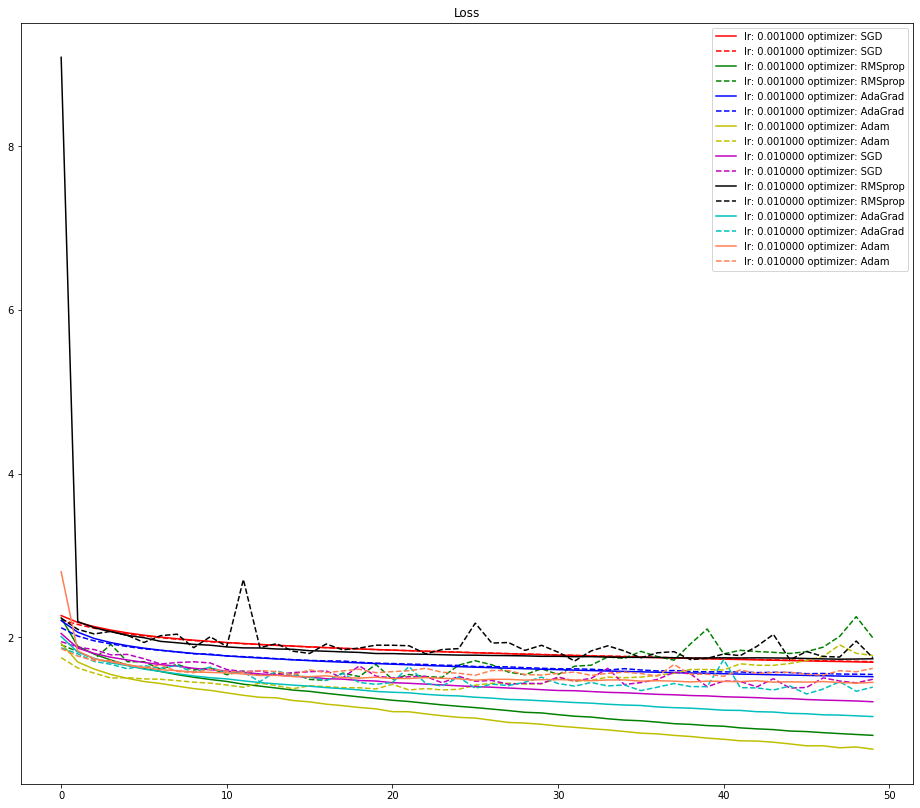

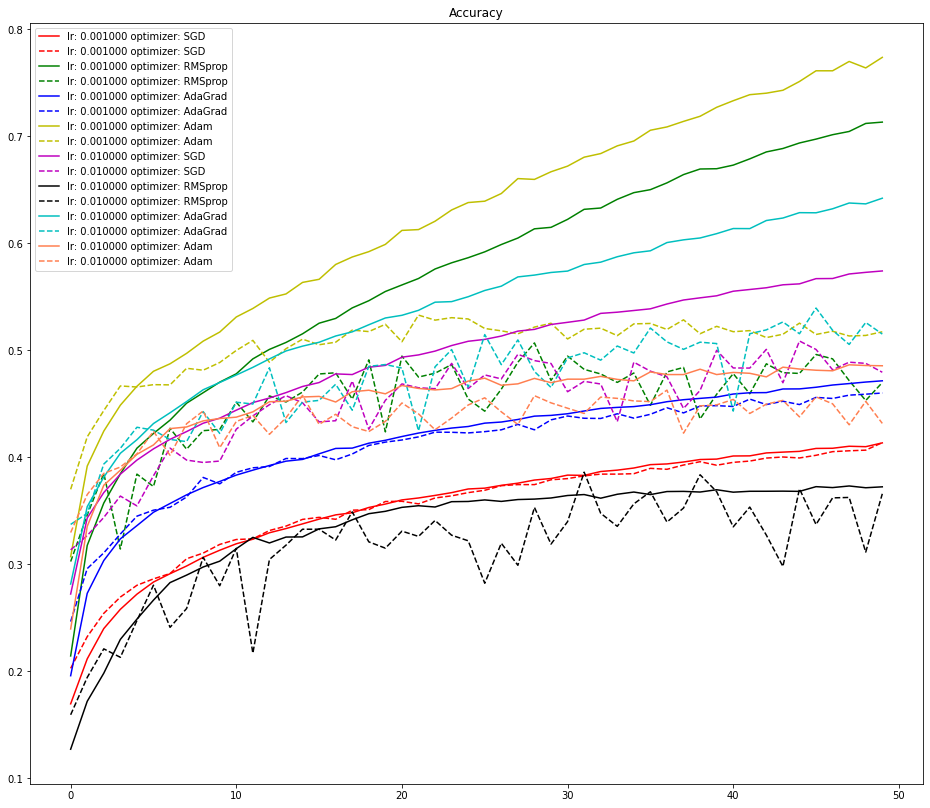

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k",'c','coral']

plt.figure(figsize=(16,14))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(16,14))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()